In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
#Select best possible model based on silhou score who has high value near to 1
from sklearn.metrics import silhouette_score
#To configure diff values for hyperparameters when we train our model
from sklearn.model_selection import ParameterGrid

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

# Load Dataset

In [3]:
driver_df=pd.read_csv("C:\\Users\\admin\\Dropbox\\DS\\6.building-clustering-models-scikit-learn\\datasets\\driver_details.csv")
driver_df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
driver_df.shape

(4000, 3)

# Cleaning Data

In [5]:
driver_df[driver_df.isnull().any(axis=1)]

,Driver_ID,Distance_Feature,Speeding_Feature


# Explore Data


In [6]:
driver_df.describe()

,Driver_ID,Distance_Feature,Speeding_Feature
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [7]:
driver_features=driver_df.drop('Driver_ID',axis=1)

# 1.Perform Hyperparameter Tuning for KMeans Clustering(n_clusters)

In [8]:
parameters={'n_clusters':[2,3,4,5,10,20,30]}
parameter_grid=ParameterGrid(parameters)

In [9]:
list(parameter_grid)

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 4},
 {'n_clusters': 5},
 {'n_clusters': 10},
 {'n_clusters': 20},
 {'n_clusters': 30}]

In [10]:
best_score=-1
model=KMeans()

# Train the model have different number of clusters
Tweaking parameter is n_clusters:

In [11]:
#We will get number of clusters/hyperparameter from parameter_grid
for g in parameter_grid:
    #Set hyperparameters calling model.set_params,pass in g
    model.set_params(**g)
    model.fit(driver_features)
    #Compute silhouette score of clustering
    ss=metrics.silhouette_score(driver_features,model.labels_)
    #Printout parameter we used,& current silhouette score
    print('parameter: ',g, 'score: ',ss)
    #If silhouette score(ss) is better than best_score,store this as best_grid,best_ss_score
    if ss>best_score:
        best_score=ss
        best_grid=g

parameter:  {'n_clusters': 2} score:  0.8490223286225532
parameter:  {'n_clusters': 3} score:  0.8231396834167266
parameter:  {'n_clusters': 4} score:  0.5907475009381601
parameter:  {'n_clusters': 5} score:  0.5126744507383274
parameter:  {'n_clusters': 10} score:  0.435641336684125
parameter:  {'n_clusters': 20} score:  0.3858687740340374
parameter:  {'n_clusters': 30} score:  0.3420458682192376


In [12]:
best_grid

{'n_clusters': 2}

# Visualize the 2 features using matplotlib

Text(0, 0.5, 'Speeding features')

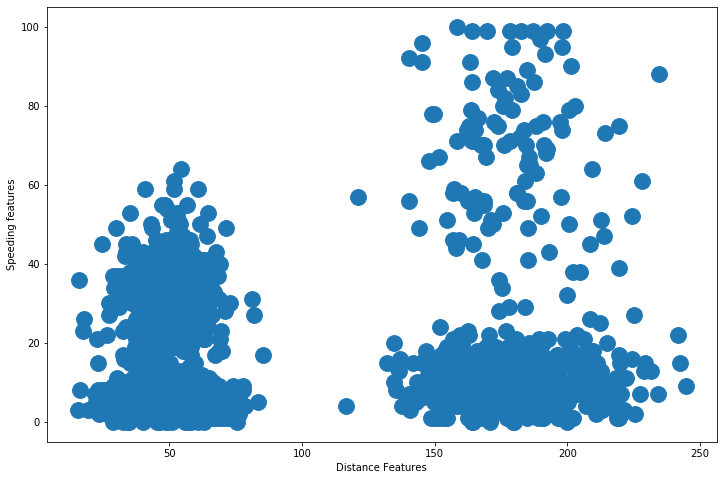

In [13]:
fig,ax=plt.subplots(figsize=(12,8))

plt.scatter(driver_features['Distance_Feature'],driver_features['Speeding_Feature'],s=250)
plt.xlabel('Distance Features')
plt.ylabel('Speeding features')

# 2.Hyperparameter tuning for DBSCAN
Parameters-eps:minimum distance for points neigbors,min_samples:min points req to form dense region

In [14]:
#Set range of values for eps,min_samples parameter pass to parametergrid()
parameters={'eps':[0.9,1.0,5.0,10.0,12.0,14.0,20.0],
            'min_samples':[5,7,10,12]}
parameter_grid=ParameterGrid(parameters)
list(parameter_grid)

[{'eps': 0.9, 'min_samples': 5},
 {'eps': 0.9, 'min_samples': 7},
 {'eps': 0.9, 'min_samples': 10},
 {'eps': 0.9, 'min_samples': 12},
 {'eps': 1.0, 'min_samples': 5},
 {'eps': 1.0, 'min_samples': 7},
 {'eps': 1.0, 'min_samples': 10},
 {'eps': 1.0, 'min_samples': 12},
 {'eps': 5.0, 'min_samples': 5},
 {'eps': 5.0, 'min_samples': 7},
 {'eps': 5.0, 'min_samples': 10},
 {'eps': 5.0, 'min_samples': 12},
 {'eps': 10.0, 'min_samples': 5},
 {'eps': 10.0, 'min_samples': 7},
 {'eps': 10.0, 'min_samples': 10},
 {'eps': 10.0, 'min_samples': 12},
 {'eps': 12.0, 'min_samples': 5},
 {'eps': 12.0, 'min_samples': 7},
 {'eps': 12.0, 'min_samples': 10},
 {'eps': 12.0, 'min_samples': 12},
 {'eps': 14.0, 'min_samples': 5},
 {'eps': 14.0, 'min_samples': 7},
 {'eps': 14.0, 'min_samples': 10},
 {'eps': 14.0, 'min_samples': 12},
 {'eps': 20.0, 'min_samples': 5},
 {'eps': 20.0, 'min_samples': 7},
 {'eps': 20.0, 'min_samples': 10},
 {'eps': 20.0, 'min_samples': 12}]

# Use silhouette score to evaluate this model

In [15]:
model=DBSCAN()
best_score=-1

In [16]:
#Run a loop for all hyperparameter combination in parameter_grid
for g in parameter_grid:
    #call set_params to assign these hyperparameters to our model
    model.set_params(**g)
    #call fit for drivers data
    model.fit(driver_features)
    #Once model has evaluated clusters your data,calculate silhouette score and print
    ss=metrics.silhouette_score(driver_features,model.labels_)
    print('parameter: ',g,'score: ',ss)
    #If silhoueets score(SS) is greater than best_score,store result in best_score,best_grid
    if ss>best_score:
        best_score=ss
        best_grid=g
    

parameter:  {'eps': 0.9, 'min_samples': 5} score:  -0.6057173612292268
parameter:  {'eps': 0.9, 'min_samples': 7} score:  -0.4265046999507063
parameter:  {'eps': 0.9, 'min_samples': 10} score:  -0.39254168253371013
parameter:  {'eps': 0.9, 'min_samples': 12} score:  -0.4286838741223884
parameter:  {'eps': 1.0, 'min_samples': 5} score:  -0.6155746493060738
parameter:  {'eps': 1.0, 'min_samples': 7} score:  -0.41637001640330673
parameter:  {'eps': 1.0, 'min_samples': 10} score:  -0.3837814631696031
parameter:  {'eps': 1.0, 'min_samples': 12} score:  -0.38648235283744914
parameter:  {'eps': 5.0, 'min_samples': 5} score:  0.31011275260225
parameter:  {'eps': 5.0, 'min_samples': 7} score:  0.7820011223700856
parameter:  {'eps': 5.0, 'min_samples': 10} score:  0.7974222681120255
parameter:  {'eps': 5.0, 'min_samples': 12} score:  0.7914367881923341
parameter:  {'eps': 10.0, 'min_samples': 5} score:  0.7598056658175874
parameter:  {'eps': 10.0, 'min_samples': 7} score:  0.8157570071704705
par

In [17]:
best_grid

{'eps': 20.0, 'min_samples': 5}

# Perform DBSCAN clustering using above values

In [18]:
model.set_params(**best_grid)
model.fit(driver_features)

DBSCAN(algorithm='auto', eps=20.0, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [26]:
len(model.labels_)

4000

# Find n_clusters:

In [27]:
n_clusters=len(set(model.labels_))-(1 if -1 in model.labels_ else 0)
n_clusters

2

In [28]:
n_noise=list(model.labels_).count(-1)
n_noise

0

# Another Hyperparameters

In [31]:
#Other parameter in another_grid to apply value(Not good silhoeutte score in clustering model)
another_grid={'eps':5.0,'min_samples':5}

#Assign these parameters to DBSCAN model another_grid,call fit the driver_features
model.set_params(**another_grid)
model.fit(driver_features)

#Find n_clusters by set of labels
n_clusters=len(set(model.labels_))-(1 if -1 in model.labels_ else 0)
print('n_clusters',n_clusters)

#Find noisy/outlier points in list of labels
n_noise=list(model.labels_).count(-1)
print('n_noise',n_noise)

n_clusters 7
n_noise 117


In [33]:
#Other parameter in another_grid to apply value(Not good silhoeutte score in clustering model)
another_grid={'eps':5.0,'min_samples':7}

#Assign these parameters to DBSCAN model another_grid,call fit the driver_features
model.set_params(**another_grid)
model.fit(driver_features)

#Find n_clusters by set of labels
n_clusters=len(set(model.labels_))-(1 if -1 in model.labels_ else 0)
print('n_clusters',n_clusters)

#Find noisy/outlier points in list of labels
n_noise=list(model.labels_).count(-1)
print('n_noise',n_noise)

n_clusters 3
n_noise 157


# 3.Hyperparameter Tuning for Mean Shift clustering
Parameter is bandwidth(SD) of kernel

In [34]:
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(driver_features)


33.960524729584314

# Peroform Mean Shift clustering using above value

In [36]:
#Instantiate estimator
model=MeanShift(bandwidth=estimate_bandwidth(driver_features))
model.fit(driver_features)
#Calculate silhouette score wheteher it is good/bad(high value ss is best)
metrics.silhouette_score(driver_features,model.labels_)

0.8231396834167266